In [10]:
#The purpose of this notebook is to take in the paper_ligand_results and determine how many ligands we would have potentially noticed if we did discovery with them
#We'll note if we would have kept the ligand if the intera tion count is >5 and either the ddg in the top 10 percentile with a real motif ratio of at least 0.25 or the real motif ratio was at least 0.5

#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [11]:
#create main dataframe that will hold counts for how the ligands fared
#The data will be boiled down to a yes or no as to whether we would have noticed the ligands

# Example publication names (unique identifiers)
publication_names = ["Gryniukova et al", "Sadybekov et al", "Publication_3"]

# Initialize the DataFrame with default values (e.g., zeros for integer values)
main_df = pd.DataFrame({
    "found": [0] * len(publication_names),      # Set initial integer values
    "not_found": [0] * len(publication_names)
}, index=publication_names)                     # Use publication names as row names

print(main_df)

                  found  not_found
Gryniukova et al      0          0
Sadybekov et al       0          0
Publication_3         0          0


In [20]:
#read in paper data
#read in the data csv
#AI powered
#Gryniukova et al
df = pd.read_csv("../../../benchmarking_other_papers/papers/AI-powered_Virtual_Screening_of_Large_Compound_Libraries_leads_to_the_Discovery_of_Novel_Inhibitors_of_Sirtuin-1/analysis_results/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = 9

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Gryniukova et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.02 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Gryniukova et al", "not_found"] = main_df.loc["Gryniukova et al", "not_found"] - 1
        main_df.loc["Gryniukova et al", "found"] = main_df.loc["Gryniukova et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z31269192
We would identify ligand Z26395449
We would identify ligand Z240678214
We would identify ligand Z26395518
We would identify ligand Z254577874
We would identify ligand Z32440384
We would identify ligand Z26395441
We would identify ligand Z26395442
We would identify ligand Z26395438


In [17]:
#read in paper data
#read in the data csv
#Synthon
#Sadybekov et al
df = pd.read_csv("../../../benchmarking_other_papers/papers/Synthon-based_ligand_discovery_in_virtual_libraries_of_over_11_billion_compounds/analysis_space/paper_ligands_rank.csv")

#number of ligands in the paper that we tried to work with
num_ligands = 7

#seed the main df not found column with the number of ligands, and we will take 1 from not found to found for each ligand that we would have found
main_df.loc["Sadybekov et al", "not_found"] = num_ligands

#run through each ligand from the paper and determine if we would have kept it
# Iterate through each row
for index, row in df.iterrows():
    #print(f"Found: {row['found']}, Not Found: {row['not_found']}")
    lig_found = False
    if row['best_interaction'] >= 6:
        if (row['ddg_percentile'] <= 0.05 and row['best_real_motif_ratio'] >= 0.25) or row['best_real_motif_ratio'] >= 0.5:
            lig_found = True
            
    if lig_found:
        print("We would identify ligand " + row['ligand'])
        
        #adjust counts
        main_df.loc["Sadybekov et al", "not_found"] = main_df.loc["Sadybekov et al", "not_found"] - 1
        main_df.loc["Sadybekov et al", "found"] = main_df.loc["Sadybekov et al", "found"] + 1
    else:
        print("We would not identify ligand " + row['ligand'])

We would identify ligand Z4121492004
We would identify ligand Z4121492147
We would identify ligand Z4886816179
We would identify ligand Z4121492020
We would identify ligand Z1893460093
We would identify ligand Z4886816121
We would identify ligand Z4121493648


In [18]:
df

,ligand,best_ddg,ddg_rank,ddg_percentile,best_interaction,interaction_rank,interaction_percentile,best_real_motif_count,real_motif_count_rank,real_motif_count_percentile,best_real_motif_ratio,real_motif_ratio_rank,real_motif_ratio_percentile,Unnamed: 13
0,Z4121492004,-76.162438,364,0.131932,12.0,229,0.083001,4.0,1025,0.371511,1.0,2611,0.946357,NaN
1,Z4121492147,-76.162436,609,0.220732,11.0,565,0.204784,4.0,1025,0.371511,1.0,2611,0.946357,NaN
2,Z4886816179,-76.162436,609,0.220732,13.0,98,0.035520,4.0,1025,0.371511,1.0,2611,0.946357,NaN
3,Z4121492020,-76.162436,609,0.220732,10.0,1244,0.450888,4.0,1025,0.371511,1.0,2611,0.946357,NaN
4,Z1893460093,-76.162436,609,0.220732,11.0,565,0.204784,5.0,267,0.096774,1.0,2611,0.946357,NaN
5,Z4886816121,-76.162436,609,0.220732,11.0,565,0.204784,4.0,1025,0.371511,1.0,2611,0.946357,NaN
6,Z4121493648,-76.162436,609,0.220732,7.0,2681,0.971729,4.0,1025,0.371511,1.0,2611,0.946357,NaN


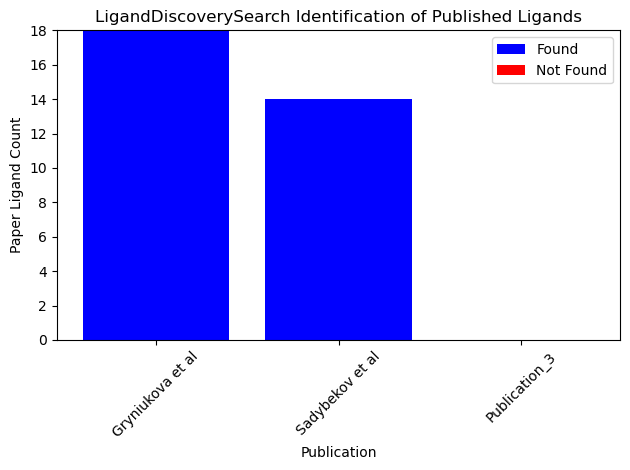

In [19]:
#stacked bar plot to show the number of ligands that would be/would not be identified from each publication
# Plot
fig, ax = plt.subplots()

# Plot the "found" bars in blue
ax.bar(main_df.index, main_df['found'], color='blue', label='Found')

# Plot the "not_found" bars in red, stacking them on top of "found"
ax.bar(main_df.index, main_df['not_found'], bottom=main_df['found'], color='red', label='Not Found')

# Add labels and legend
ax.set_ylabel('Paper Ligand Count')
ax.set_xlabel('Publication')
ax.set_title('LigandDiscoverySearch Identification of Published Ligands')
ax.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better fit
plt.show()